In [1]:
import control as ct
import matplotlib.pyplot as plt
from control.matlab import *
import numpy as np
import pandas as pd


In [2]:
#System parameters and constants
# System Gain[C/V]
K = 3.5

# Time constant [s]
T = 23

# System time-delay
tau = 3

# Order of the padé Approximation
N = 10

#Set up transfer function to represent the time constant dynamics of the air heater
num = [K]
den = [T, 1]
H1 = ct.tf(num,den)
print ('H1(S)=', H1)

# Set up transfer function to represent the time delay of air heater
[num_pade, den_pade] = ct.pade(tau,N)
Hpade = ct.tf(num_pade, den_pade)
print ('Hpade(S)=', Hpade)

# Connect the time constant and time delay transfer functions together
H = ct.series(H1, Hpade)

#Print the resulting function
print ('H(S)=', H)


H1(S)= 
  3.5
--------
23 s + 1

Hpade(S)= 
s^10 - 36.67 s^9 + 660 s^8 - 7627 s^7 + 6.228e+04 s^6 - 3.737e+05 s^5 + 1.661e+06 s^4 - 5.378e+06 s^3 + 1.21e+07 s^2 - 1.703e+07 s + 1.135e+07
----------------------------------------------------------------------------------------------------------------------------------------------
s^10 + 36.67 s^9 + 660 s^8 + 7627 s^7 + 6.228e+04 s^6 + 3.737e+05 s^5 + 1.661e+06 s^4 + 5.378e+06 s^3 + 1.21e+07 s^2 + 1.703e+07 s + 1.135e+07

H(S)= 
          3.5 s^10 - 128.3 s^9 + 2310 s^8 - 2.669e+04 s^7 + 2.18e+05 s^6 - 1.308e+06 s^5 + 5.813e+06 s^4 - 1.882e+07 s^3 + 4.235e+07 s^2 - 5.961e+07 s + 3.974e+07
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
23 s^11 + 844.3 s^10 + 1.522e+04 s^9 + 1.761e+05 s^8 + 1.44e+06 s^7 + 8.658e+06 s^6 + 3.857e+07 s^5 + 1.254e+08 s^4 + 2.837e+08 s^3 + 4.038e+08 s^2 + 2.782e+08 s + 1.135e+07



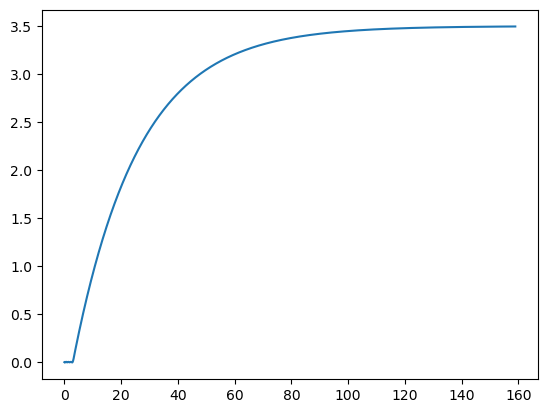

In [3]:
# Performe a step response to the transfer function system
ttf,ytf = ct.step_response(H)

# Plott the transfer function
plt.plot(ttf,ytf)


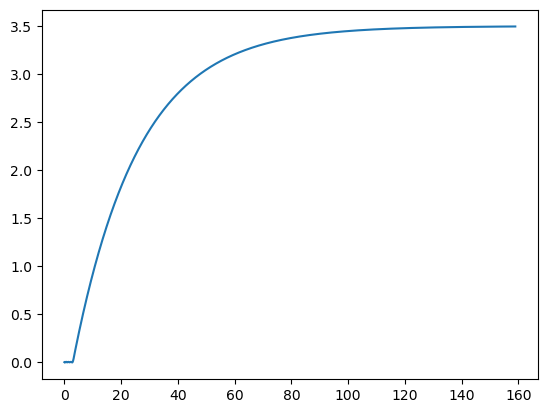

In [4]:
# Transfer the model from transfer function model to continious state space model
Hss = ct.matlab.tf2ss(H, dt=0)

# Performe a step response to the state space system
tss,yss = ct.step_response(Hss)
plt.plot(tss,yss)

In [5]:
# print the max and min from the difference between the step response in the transfer function and state space model.
print ("The maximum value is: " + str(max(ytf-yss)) + "\nThe minimum value is: " + str(min(ytf-yss) ))

The maximum value is: 0.0
The minimum value is: 0.0


In [6]:
# Write matrices to .CSV files
pd.DataFrame(Hss.A).to_csv("DataFiles/AirHeaterSS_A.csv", sep=',',columns=None, index=False, decimal='.', header=False)
pd.DataFrame(Hss.B).to_csv("DataFiles/AirHeaterSS_B.csv", sep=',',columns=None, index=False, decimal='.', header=False)
pd.DataFrame(Hss.C).to_csv("DataFiles/AirHeaterSS_C.csv", sep=',',columns=None, index=False, decimal='.', header=False)
pd.DataFrame(Hss.D).to_csv("DataFiles/AirHeaterSS_D.csv", sep=',',columns=None, index=False, decimal='.', header=False)


In [7]:
# Generate a discrete time state space model
HssD = Hss.sample(0.01, method='euler')
# Write matrices to .CSV files
pd.DataFrame(HssD.A).to_csv("DataFiles/AirHeaterSSD_A.csv", sep=',',columns=None, index=False, decimal='.', header=False)
pd.DataFrame(HssD.B).to_csv("DataFiles/AirHeaterSSD_B.csv", sep=',',columns=None, index=False, decimal='.', header=False)
pd.DataFrame(HssD.C).to_csv("DataFiles/AirHeaterSSD_C.csv", sep=',',columns=None, index=False, decimal='.', header=False)
pd.DataFrame(HssD.D).to_csv("DataFiles/AirHeaterSSD_D.csv", sep=',',columns=None, index=False, decimal='.', header=False)
